# Úvod
Pro analýzu jsem si zvolili datovou sadu statistik ze Spotify.

# Explorativní analýza

Pro každý následující bod je implementována odpovídající sekce ve zdrojovém kódu a zjištěné výsledky jsou popsány v dokumentaci:

1. **Průzkum atributů datové sady**: prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)
2. **Průzkum rozložení hodnot**: prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.) a věnujte se různým atributům. V dokumentaci také všechny grafy vhodně okomentujte – popište, jaké informace z nich můžeme vyčíst.
3. **Analýza odlehlých hodnot**: zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. V dokumentaci popište, jakým způsobem jste odlehlé hodnoty detekovali, a jaké hodnoty jste objevili.
4. **Analýza chybějících hodnot**: proveďte podrobnou analýzu chybějící hodnot. V dokumentaci popište celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.
5. **Korelační analýza numerických atributů**: proveďte korelační analýzu numerických atributů (k analýze využijte grafy i korelační koeficienty).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Průzkum atributů datové sady

Průzkum jednotlivých atributů datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

Načtení datasetu a kontrolní výpis hlavičky pro prvotní přehled.

In [2]:
data = pd.read_csv('./spotify-2023.csv', encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Jelikož je výpis výše zjednodušený a nejsou zobrazeny všechny atributy, příkaz níže vypisuje všechny sloupce (atributy) přítomné v datasetu.

In [3]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Zobrazení souhrnnějších informací o datasetu. Už z tohoto výstupu můžeme vidět, že některé položky mají nevyplněnou hodnotu (menší počet non-null hodnot).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Pro **numerické atributy** vypisujeme základní statistiky, z čehož bychom už potenciálně mohli odhalit nějaké odlehlé hodnoty.


Přeložit:
The year of release of the latest song in the dataset is (of course) 2023, with the oldest dating back to 1930.
Some of the most streamed songs never landed in the charts.
The most number of streams is 3,703,895,000, while the least number of streams is 2,762.
The mean number of streams is 514,137,400 with a standard deviation of 566,856,900, which indicates that the number of streams varies by a huge value.

In [6]:
data.describe().loc[['mean', 'std', 'min', 'max']]

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Pro **kategorické atributy** můžeme zjistit např. nejčastěji se vyskytující hodnoty a jejich počet. Vidíme, že jako kategorické byly vybrány i takové atributy, které by správně měly mít datový typ čísla. Vybereme tedy pouze relevantní kategorické atributy.

In [7]:
# identifikace kategorickych atributu
categorical_attributes = [col for col in data.columns if data[col].dtype != 'int64']
print(categorical_attributes)

['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']


In [8]:
categorical_attributes = ['track_name', 'artist(s)_name', 'key', 'mode']

In [9]:
# pruzkum atributu
# Display most frequent values and their counts for each categorical attribute
for attribute in categorical_attributes:
    print(attribute)
    value_counts = data[attribute].value_counts()
    most_frequent_values = value_counts.idxmax()  # Most frequent value
    count_most_frequent = value_counts.max()  # Count of the most frequent value
    unique_values_count = len(value_counts)  # Number of unique values

    print(f"  Most frequent value: {most_frequent_values} (Count: {count_most_frequent})")
    print(f"  Number of unique values: {unique_values_count}")

track_name
  Most frequent value: Daylight (Count: 2)
  Number of unique values: 943
artist(s)_name
  Most frequent value: Taylor Swift (Count: 34)
  Number of unique values: 645
key
  Most frequent value: C# (Count: 120)
  Number of unique values: 11
mode
  Most frequent value: Major (Count: 550)
  Number of unique values: 2


## Průzkum rozložení hodnot

Průzkum rozložení hodnot jednotlivých atributů pomocí vhodných grafů se zaměřením na vztahy mezi atributy.

Rozložení hodnot numerických atributů

Pro další průzkum hodnot se bude hodit je mít v očekávatelném formátu. Jmenovitě atributy streams, in_deezer_playlists, in_shazam_charts.

In [ ]:
data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

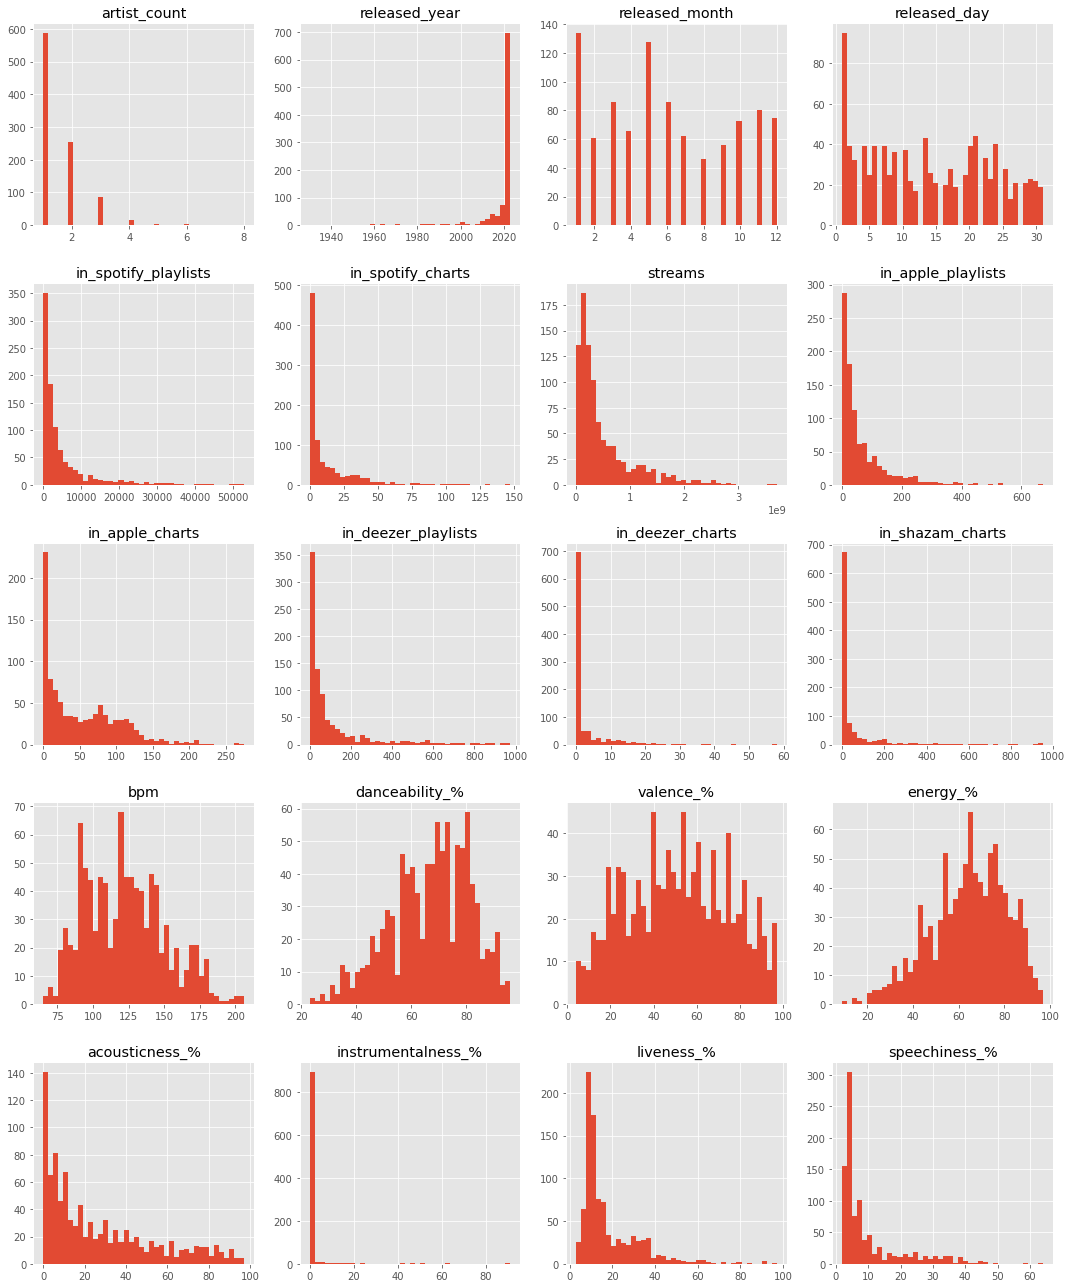

In [11]:
data.hist(bins=40, figsize=(15, 18)) 
plt.tight_layout()
plt.show()

Nejstreamovanější písničky

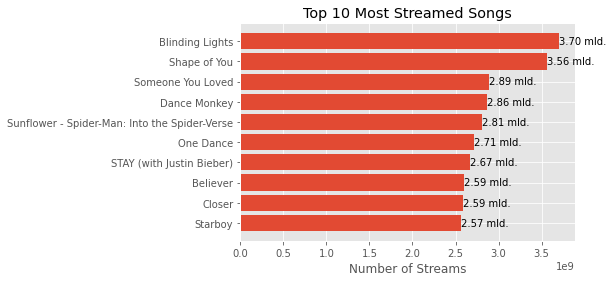

In [26]:
new_data = data.dropna(subset=['streams', 'track_name'])

# Get the 10 most streamed songs
top_10_songs = new_data.nlargest(10, 'streams')[['track_name', 'streams']]
top_10_songs = top_10_songs.sort_values(by='streams', ascending=True)

# Plot the horizontal bar chart
plt.barh(top_10_songs['track_name'], top_10_songs['streams'])
plt.xlabel('Number of Streams')
plt.title('Top 10 Most Streamed Songs')
for index, value in enumerate(top_10_songs['streams']):
    displayyy = f"{value/1e9:.2f} mld."
    plt.text(value, index, displayyy, ha='left', va='center')

plt.show()

Explore the trend in the number of streams over time. Consider plotting streams against released_year or released_month.

Use box plots to visualize the distribution of numeric attributes grouped by categorical attributes. This can provide insights into how certain categorical features influence the distribution of numeric features.

stream count je dulezita hodnota, okolo ktere se budeme chtit tocit

## Analýza odlehlých hodnot

## Analýza chybějících hodnot

V případě chybějících hodnot máme na výběr několik přístupů:
1. Smazat záznam.
2. Manuálně doplnit hodnoty.
3. Automaticky doplnit hodnoty. To u numerického atributu můžeme provést například tak, že za chybějící hodnotu doplníme průměrnou hodnotu tohoto atributu. Aby byla hodnota přesnější, tento průměr může pocházet z nějaké třídy hodnot a ne globálně celého datasetu. Další možností je doplnit null hodnotu nějakou "ne-null" hodnotou, která indikuje, že se atribut byl v originální verzi datasetu neznámý.

In [44]:
data = pd.read_csv('./spotify-2023.csv', encoding='latin-1')

In [62]:
# lze vyuzit pro kontrolu, jake unikatni hodnoty pro dane atributy existuji (napr. jestli misto null nedavame ?, ktery bychom ale neodhalili)
for column in data.columns:
    print(f"\nValue counts for '{column}':")
    print(data[column].value_counts())


Value counts for 'track_name':
track_name
Take My Breath        2
Numb                  2
About Damn Time       2
Miss You              2
Daylight              2
                     ..
Murder In My Mind     1
Gangsta's Paradise    1
CAIRO                 1
I Love You So         1
Alone                 1
Name: count, Length: 942, dtype: int64

Value counts for 'artist(s)_name':
artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

Value counts for 'artist_count':
artist_count
1    586
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: count, dtype: int64

Value counts for 'released_year':
released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Detailnější výpis počtu nulových hodnot atributů.

Atribut ```key``` unikátně charakterizuje danou píseň z hlediska stupnice (viz [dokumentace](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) Spotify). Doplnění této hodnoty na základě jiných hodnot nedává smysl, mazat 95 záznamů by však byla škoda. Dokumentace navrhuje nastavení hodnoty -1, jestliže hodnota atributu byla null.

Atribut ```in_shazam_charts``` udává hodnocení v žebříčcích vyhledávání v aplikaci Shazam (větší číslo indikuje větší oblíbenost/přítomnost v žebříčku). Nepřítomnost této hodnoty může znamenat to, že písnička se do žebříčků vůbec nedostala, proto by dávalo smysl doplnit hodnotu 0.

In [47]:
print(data.isnull().sum())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [48]:
data['key'] = data['key'].fillna(-1)

attributes_to_convert = ['streams', 'in_deezer_playlists', 'in_shazam_charts']

# Convert each specified column to numeric values
for attribute in attributes_to_convert:
    data[attribute] = pd.to_numeric(data[attribute], errors='coerce', downcast='integer')

# Convert the columns to integer type
data[attributes_to_convert] = data[attributes_to_convert].astype('Int64')

In [49]:
data['in_shazam_charts'].fillna(0, inplace=True) # in_shazam_charts ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi
data['in_deezer_playlists'].fillna(0, inplace=True) # in_deezer_playlists ma null hodnoty, ktere vyplnime 0 pro snadnou konverzi

In [50]:
print(data.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 1
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


Vznikl null záznam u streamů. Při analýze hodnoty před konverzí na datový typ integer se zjistilo, že hodnota streams pro záznam, který má aktuálně null, byla: BPM110KeyAModeMajorDanceability53Valence75Ener... Jednalo se tedy zřejmě o chybnou hodnotu, kterou by analýza odlehlých hodnot odhalila. Tento záznam tedy bude smazán.

In [53]:
# Display rows with null values in the 'streams' attribute
rows_with_null = data[data['streams'].isnull()]
rows_with_null

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,<NA>,16,...,110,A,Major,53,75,69,7,0,17,3


In [57]:
data.dropna(inplace=True)
print(data.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64


## Korelační analýza numerických atributů